In [137]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pylab as pl
#import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import math
from sklearn.metrics import mean_squared_error


import operator

from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestRegressor
#import statsmodels.api as sm

#%matplotlib inline
#sns.set(style='white', font_scale=0.9)

data_directory = os.path.join('.', 'data') 

cleaned_accepted_data_path = os.path.join(data_directory, 'Cleaned_AcceptedLoanDataV.csv')

In [138]:
accepted_df = pd.read_csv(cleaned_accepted_data_path, low_memory=False, encoding='UTF-8')
#print(accepted_df.info())
print(accepted_df.describe())

         Unnamed: 0      loan_amnt       int_rate     emp_length  \
count  1.318930e+05  131893.000000  131893.000000  131893.000000   
mean   6.616608e+05   14770.019827      13.177013       5.779071   
std    3.816988e+05    8637.705924       4.582195       3.724609   
min    9.000000e+00     600.000000       5.320000       0.000000   
25%    3.306750e+05    8000.000000       9.750000       2.000000   
50%    6.619550e+05   13000.000000      12.790000       6.000000   
75%    9.926680e+05   20000.000000      15.800000      10.000000   
max    1.321843e+06   40000.000000      30.990000      10.000000   

         annual_inc            dti    delinq_2yrs  earliest_cr_line  \
count  1.318930e+05  131893.000000  131893.000000     131893.000000   
mean   7.707095e+04      18.242888       0.330167         18.636759   
std    7.085021e+04       8.296326       0.890223          7.559317   
min    4.800000e+03       0.000000       0.000000          0.000000   
25%    4.680000e+04      12.0400

In [139]:
accepted_df = pd.read_csv(cleaned_accepted_data_path, low_memory=False, encoding='UTF-8')
print(accepted_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131893 entries, 0 to 131892
Data columns (total 34 columns):
Unnamed: 0                    131893 non-null int64
loan_amnt                     131893 non-null float64
term                          131893 non-null object
int_rate                      131893 non-null float64
emp_length                    131893 non-null float64
home_ownership                131893 non-null object
annual_inc                    131893 non-null float64
verification_status           131893 non-null object
issue_d                       131893 non-null object
purpose                       131893 non-null object
dti                           131893 non-null float64
delinq_2yrs                   131893 non-null float64
earliest_cr_line              131893 non-null int64
inq_last_6mths                131893 non-null float64
mths_since_last_delinq        131893 non-null float64
pub_rec                       131893 non-null float64
revol_bal                     1318

In [140]:
cols_to_keep = ['loan_amnt','emp_length','dti','mean_fico','annual_inc']


In [141]:
c1 = accepted_df[(accepted_df['loan_amnt'] >= 1000) & (accepted_df['loan_amnt'] <= 35000)]
c2=c1[(c1['annual_inc'] >= 10000) & (c1['annual_inc']<=45000)]
c3=c2[(c2['emp_length'] >= 0) & (c1['emp_length'] <= 3)]
#c4=c3[(c3['term']>='36 months') ] 


df1 = c3[['loan_amnt','emp_length','dti','mean_fico','annual_inc','int_rate']]


C:\Users\mahesh\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [142]:
df1.head()

,loan_amnt,emp_length,dti,mean_fico,annual_inc,int_rate
5,2800.0,1.0,16.22,722.0,43000.0,9.75
6,2950.0,0.0,12.57,667.0,21000.0,18.55
8,5450.0,2.0,13.38,672.0,40000.0,22.45
16,5000.0,3.0,31.60,667.0,24000.0,13.99
20,4000.0,3.0,12.18,747.0,42000.0,11.47


In [144]:
c3.head()

,Unnamed: 0,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,...,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mort_acc,pct_tl_nvr_dlq,timestamp,fico_range,mean_fico,last_fico_range,last_mean_fico
5,1044671,2800.0,36 months,9.75,1.0,RENT,43000.0,Not Verified,Jun-2016,home_improvement,...,3281.0,0.0,0.0,0.0,100.0,1491434284,720.0-724.0,722.0,685.0-689.0,687.0
6,571760,2950.0,36 months,18.55,0.0,OWN,21000.0,Verified,Oct-2015,credit_card,...,8352.0,0.0,0.0,0.0,100.0,1491434180,665.0-669.0,667.0,670.0-674.0,672.0
8,431095,5450.0,36 months,22.45,2.0,RENT,40000.0,Source Verified,Mar-2014,moving,...,4513.0,0.0,0.0,0.0,100.0,1491434044,670.0-674.0,672.0,625.0-629.0,627.0
16,839150,5000.0,36 months,13.99,3.0,OWN,24000.0,Source Verified,Feb-2015,debt_consolidation,...,1731.0,0.0,0.0,1.0,75.0,1491434180,665.0-669.0,667.0,550.0-554.0,552.0
20,892761,4000.0,36 months,11.47,3.0,RENT,42000.0,Source Verified,Mar-2016,major_purchase,...,3759.0,0.0,0.0,0.0,100.0,1491434252,745.0-749.0,747.0,700.0-704.0,702.0


In [112]:
X=c3[cols_to_keep]
Y=c3['int_rate']
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)

regr_rf.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [133]:
#python setup.py install
import pybrain
import sklearn
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
net = buildNetwork(18,19, 1)

ImportError: No module named 'pybrain'

In [ ]:
ds = SupervisedDataSet(18,1)

for index, row in curr_data.iterrows():
    input_data = row[cols_to_keep]
    output_data = row['OriginalInterestRate']
    ds.addSample(input_data,output_data)

In [ ]:
trainer = BackpropTrainer(net, ds)

In [ ]:
trainer.train()

In [ ]:
trainer.trainUntilConvergence()

In [145]:
accepted_df_y = df1[['int_rate']]
accepted_df_x = df1.drop(['int_rate'], axis=1)

train_df_x, test_df_x, train_df_y, test_df_y = model_selection.train_test_split(
    accepted_df_x, accepted_df_y, test_size=0.5, random_state=42)

print("train_df_x:")
print(train_df_x.shape)

print("train_df_y:")
print(train_df_y.shape)

print("test_df_x:")
print(test_df_x.shape)

print("test_df_y:")
print(test_df_y.shape)

train_df_x:
(7763, 5)
train_df_y:
(7763, 1)
test_df_x:
(7763, 5)
test_df_y:
(7763, 1)


In [119]:
#Random Forest
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
def rand_forest(train_df_x,train_df_y,test_df_x,test_df_y):
    max_depth = 30
    regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
    regr_rf.fit(train_df_x,train_df_y)
    print('Random Forest -> Fit successful')
    # Predict on new data 
    y_rf = regr_rf.predict(test_df_x)
    #print(y_rf)
    score=cross_val_score(regr_rf,train_df_x,train_df_y).mean()    
    rms = sqrt(mean_squared_error(test_df_y, y_rf))
    print('Random Forest -> Score : ',score)
    print('Random Forest -> mean_absolute_error : ',mean_absolute_error(test_df_y,y_rf))
    print('Random Forest -> mean_squared_error : ',mean_squared_error(test_df_y,y_rf))
    print('Random Forest -> root_mean_squared_error :',rms)
#print('Random Forest -> median_absolute_error : ',median_absolute_error(test_df_y,y_rf))
rand_forest(train_df_x,train_df_y,test_df_x,test_df_y)

C:\Users\mahesh\Miniconda3\lib\site-packages\ipykernel\__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest -> Fit successful


C:\Users\mahesh\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mahesh\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Random Forest -> Score :  0.078144474522
Random Forest -> mean_absolute_error :  3.16908932903
Random Forest -> mean_squared_error :  16.6376472368
RMSE 4.07892721641253


C:\Users\mahesh\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [128]:
#import pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet

from pybrain.supervised.trainers import BackpropTrainer
def Neural_nwt(train_df_x,test_df_x):

    net = buildNetwork(18,5, 1)

    ds = SupervisedDataSet(18,1)



    for index, row in df1.iterrows():

        input_data = row[cols_to_keep]

        output_data = row['int_rate']

        ds.addSample(input_data,output_data)

    

    print('Neural_nwt -> Samples Added')

    print('Neural_nwt -> Training network')

    trainer = BackpropTrainer(net, ds)

    trainer.trainUntilConvergence()

    

    print('Neural_nwt -> Activating inputs')

    for index, row in next_data.iterrows():

        input_data = row[cols_to_keep]

        output_data = row['int_rate']

        #ds.addSample(input_data,output_data)

        print(net.activate(input_data))
Neural_nwt(train_df_x,test_df_x)

ImportError: No module named 'pybrain'

In [120]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0

In [146]:
from sklearn.neural_network import MLPClassifier
   

KNN---------------
Training Data:
MAE:2.85108312937
RMSE:3.6477975530534903
Median Absolute Error:2.35833333333


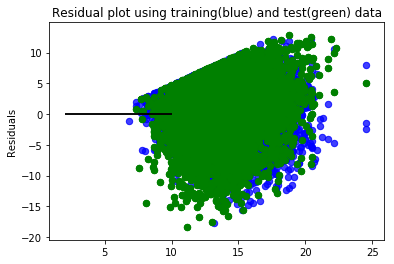

In [156]:
##KNN
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.metrics import median_absolute_error
def computations(org,x,y):
    testlr=org.predict(x)
    #Mean Absolute Error 
    mae=mean_absolute_error(y,testlr);
    print("MAE:"+str(mae))
    #RMSE 
    rmse=math.sqrt(mean_squared_error(y,testlr))
    print("RMSE:"+str(rmse))
    #Median Absolute error
    Medae=median_absolute_error(y,testlr)
    print("Median Absolute Error:"+str(Medae))    
def KNNAnalysis(train_df_x,test_df_x):
    neigh = KNeighborsRegressor(n_neighbors=6)
    neigh.fit(train_df_x,train_df_y) 
    print("KNN---------------")
    computations(neigh,train_df_x,train_df_y)
    plt.scatter(neigh.predict(train_df_x),neigh.predict(train_df_x)-train_df_y,c='b',s=40,alpha=0.5)
    plt.scatter(neigh.predict(test_df_x),neigh.predict(test_df_x)-test_df_y,c="g",s=40)
    plt.hlines(y=0,xmin=2,xmax=10)
    plt.title('Residual plot using training(blue) and test(green) data')
    plt.ylabel('Residuals')
    plt.show()
KNNAnalysis(train_df_x,test_df_x)

In [163]:
#Neural Network
from pybrain.datasets.supervised import SupervisedDataSet as SDS


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import *
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets.supervised import SupervisedDataSet as SDS
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
def NeuralNetworkAnalysis(train_df_x,test_df_x):
    print("Neural Network Analysis-------------")
    hidden_size = 3
    epochs = 2
    input_size = train_df_x.shape[1]
    target_size = train_df_y.shape[1]
    ds = SDS( input_size, target_size )
    ds.setField( 'input', train_df_x )
    ds.setField( 'target', train_df_y )

    net = buildNetwork( input_size, hidden_size, target_size, bias = True )
    trainer = BackpropTrainer( net,ds )

    print("Training for {} epochs...".format( epochs ))

    for i in range( epochs ):
        mse = trainer.train()
        rmse = math.sqrt( mse )
    print("Training RMSE, epoch {}: {}".format( i + 1, rmse ))

    #y_test1=TestData1.int_rt
    #y_test1=y_test1.reshape(-1,1)
    #TestData1.drop('int_rt',axis=1,inplace=True)
    #x_test1=TestData1

    input_size = test_df_x.shape[1]
    target_size = test_df_y.shape[1]

    ds = SDS( input_size, target_size )
    ds.setField( 'input', test_df_x)
    ds.setField( 'target',test_df_y)

    p = net.activateOnDataset( ds )

    mse = mean_squared_error(test_df_y, p )
    rmse =math.sqrt(mse)
    print("Testing rmse:"+str(rmse))
    
NeuralNetworkAnalysis(train_df_x,test_df_x)

ImportError: No module named 'pybrain'